In [3]:
import os
import pandas as pd  # Import pandas for table representation
import re


In [5]:
# Define the subfolders
subfolders = ['parallel_mpi/logs'
              #, 'parallel_openmpi/logs', 'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[3]  # Fourth part is matrix size
                    core_number = tokens[4]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_mpi = pd.DataFrame(extracted_data)
extracted_data_df_mpi['Seconds']=extracted_data_df_mpi['Log'].apply(lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)


KeyError: 'Log'

In [ ]:
# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_mpi['Seconds'] = pd.to_numeric(extracted_data_df_mpi['Seconds'], errors='coerce')
# drop rows where 'Seconds' is NaN
extracted_data_df_mpi.dropna(subset=['Seconds'], inplace=True)

# Display the DataFrame
# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_mpi['Core Number'] = extracted_data_df_mpi['Core Number'].astype(int)
extracted_data_df_mpi['Matrix Size'] = extracted_data_df_mpi['Matrix Size'].astype(int)

# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_mpi.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)
extracted_data_df_mpi

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
1,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.302...,3.302270
2,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication took 1.749...,1.749870
4,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication took 0.872...,0.872999
5,parallel_mpi/logs,matmul_parallel_mpi_1024_8_output.log,1024,8,MPI 1024x1024 matrix multiplication took 1.054...,1.054896
0,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication took 0.338...,0.338842
3,parallel_mpi/logs,matmul_parallel_mpi_1024_32_output.log,1024,32,MPI 1024x1024 matrix multiplication took 0.555...,0.555122
13,parallel_mpi/logs,matmul_parallel_mpi_2048_1_output.log,2048,1,MPI 2048x2048 matrix multiplication took 41.40...,41.406049
14,parallel_mpi/logs,matmul_parallel_mpi_2048_2_output.log,2048,2,MPI 2048x2048 matrix multiplication took 26.47...,26.474181
16,parallel_mpi/logs,matmul_parallel_mpi_2048_4_output.log,2048,4,MPI 2048x2048 matrix multiplication took 13.28...,13.285272
17,parallel_mpi/logs,matmul_parallel_mpi_2048_8_output.log,2048,8,MPI 2048x2048 matrix multiplication took 6.864...,6.864565


In [ ]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              'parallel_openmpi/logs'
              #'serial_mpi/logs'
              ]

# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Convert the extracted data into a DataFrame
extracted_data_df_openmpi = pd.DataFrame(extracted_data)
extracted_data_df_openmpi["Seconds"]=extracted_data_df_openmpi['Log'].apply(lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)


In [ ]:
# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_openmpi['Core Number'] = extracted_data_df_openmpi['Core Number'].astype(int)
extracted_data_df_openmpi['Matrix Size'] = extracted_data_df_openmpi['Matrix Size'].astype(int)

# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_openmpi['Seconds'] = pd.to_numeric(extracted_data_df_openmpi['Seconds'], errors='coerce')
# Drop rows where 'Seconds' is NaN
extracted_data_df_openmpi.dropna(subset=['Seconds'], inplace=True)
# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_openmpi.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_openmpi

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
1,parallel_openmpi/logs,matmul_openmpi_1024_2_output.log,1024,2,OpenMP outer‐product matmul: N = 1024 (allocat...,0.679617
3,parallel_openmpi/logs,matmul_openmpi_1024_4_output.log,1024,4,OpenMP outer‐product matmul: N = 1024 (allocat...,0.706506
4,parallel_openmpi/logs,matmul_openmpi_1024_8_output.log,1024,8,OpenMP outer‐product matmul: N = 1024 (allocat...,0.723567
0,parallel_openmpi/logs,matmul_openmpi_1024_16_output.log,1024,16,OpenMP outer‐product matmul: N = 1024 (allocat...,0.669052
2,parallel_openmpi/logs,matmul_openmpi_1024_32_output.log,1024,32,OpenMP outer‐product matmul: N = 1024 (allocat...,0.680650
10,parallel_openmpi/logs,matmul_openmpi_2024_8_output.log,2024,8,OpenMP outer‐product matmul: N = 2024 (allocat...,8.129223
12,parallel_openmpi/logs,matmul_openmpi_2048_1_output.log,2048,1,OpenMP outer‐product matmul: N = 2048 (allocat...,8.424309
13,parallel_openmpi/logs,matmul_openmpi_2048_2_output.log,2048,2,OpenMP outer‐product matmul: N = 2048 (allocat...,7.269258
15,parallel_openmpi/logs,matmul_openmpi_2048_4_output.log,2048,4,OpenMP outer‐product matmul: N = 2048 (allocat...,7.667556
16,parallel_openmpi/logs,matmul_openmpi_2048_8_output.log,2048,8,OpenMP outer‐product matmul: N = 2048 (allocat...,7.230903


In [ ]:
import os
import pandas as pd  # Import pandas for table representation

# Define the subfolders
subfolders = [#'parallel_mpi/logs'
              #'parallel_openmpi/logs'
              'serial_mpi/logs'
              ]

def extract_data_from_serial_logs(subfolders):
    """
    Extracts data from serial log files in the specified subfolders.
    Args:

        subfolders (list): List of subfolder paths containing log files.
    Returns:
        pd.DataFrame: DataFrame containing extracted data with columns for folder, log file, matrix size, core number, and log content.
    """
    # Initialize a dictionary to store logs from each folder
    logs = {}

    # Initialize a list to store extracted data
    extracted_data = []

    # Iterate through each subfolder and read log files
    for folder in subfolders:
        logs[folder] = []
        for root, _, files in os.walk(folder):
            for file in files:
                if file.endswith('output.log'):  # Check if the file is a log file
                    file_path = os.path.join(root, file)

                    with open(file_path, 'r') as f:
                        log_content = f.read()  # Read the entire content of the log file
                        logs[folder].append(log_content)

                    # Extract matrix size and core number from the file name
                    tokens = file.split('_')
                    if len(tokens) >= 5:
                        matrix_size = tokens[2]  # Fourth part is matrix size
                        core_number = tokens[3]  # Fifth part is core number
                        extracted_data.append({
                            'Folder': folder,
                            'Log File': file,
                            'Matrix Size': matrix_size,
                            'Core Number': core_number,
                            'Log': log_content  # Add the log content as the last column
                        })

    return pd.DataFrame(extracted_data)

# Extract the data from serial logs
extracted_data_df_serial = extract_data_from_serial_logs(subfolders)


# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_serial['Core Number'] = extracted_data_df_serial['Core Number'].astype(int)
extracted_data_df_serial['Matrix Size'] = extracted_data_df_serial['Matrix Size'].astype(int)
import re
# Extract the time taken from the log content
extracted_data_df_serial['Seconds'] = extracted_data_df_serial['Log'].apply(
    lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)
# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_serial['Seconds'] = pd.to_numeric(extracted_data_df_serial['Seconds'], errors='coerce')
# Drop rows where 'Seconds' is NaN
extracted_data_df_serial.dropna(subset=['Seconds'], inplace=True)
# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_serial.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_serial

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
0,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...,0.449849
2,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...,4.974136
3,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...,61.600553
4,serial_mpi/logs,matmul_serial_8192_1_output.log,8192,1,Serial matmul (outer): N = 8192 (allocating ~1...,501.753322


In [ ]:
import os
import pandas as pd  # Import pandas for table representation
import re

# Define the subfolders
subfolders = ['parallel_hybrid/logs/openmpi']
import pandas as pd  # Import pandas for table representation


# Initialize a dictionary to store logs from each folder
logs = {}

# Initialize a list to store extracted data
extracted_data = []

# Iterate through each subfolder and read log files
for folder in subfolders:
    logs[folder] = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith('output.log'):  # Check if the file is a log file
                file_path = os.path.join(root, file)

                with open(file_path, 'r') as f:
                    log_content = f.read()  # Read the entire content of the log file
                    logs[folder].append(log_content)

                # Extract matrix size and core number from the file name
                tokens = file.split('_')
                if len(tokens) >= 5:
                    matrix_size = tokens[2]  # Fourth part is matrix size
                    core_number = tokens[3]  # Fifth part is core number
                    extracted_data.append({
                        'Folder': folder,
                        'Log File': file,
                        'Matrix Size': matrix_size,
                        'Core Number': core_number,
                        'Log': log_content  # Add the log content as the last column
                    })

# Extract the data from hybrid logs
extracted_data_df_hybrid = pd.DataFrame(extracted_data)

# Convert 'Core Number' and 'Matrix Size' columns to integers for sorting
extracted_data_df_hybrid['Core Number'] = extracted_data_df_hybrid['Core Number'].astype(int)
extracted_data_df_hybrid['Matrix Size'] = extracted_data_df_hybrid['Matrix Size'].astype(int)

# Extract the time taken from the log content
extracted_data_df_hybrid['Seconds'] = extracted_data_df_hybrid['Log'].apply(
    lambda log: float(re.search(r'took ([\d.]+) seconds', log).group(1)) if re.search(r'took ([\d.]+) seconds', log) else None)

# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df_hybrid['Seconds'] = pd.to_numeric(extracted_data_df_hybrid['Seconds'], errors='coerce')

# Drop rows where 'Seconds' is NaN
extracted_data_df_hybrid.dropna(subset=['Seconds'], inplace=True)

# Sort the DataFrame by 'Matrix Size' and 'Core Number'
extracted_data_df_hybrid.sort_values(by=['Matrix Size', 'Core Number'], inplace=True)

# Display the DataFrame
extracted_data_df_hybrid

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
1,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.426...,3.426192
2,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_2_output.log,1024,2,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.426765
4,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_8_output.log,1024,8,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.634656
0,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_16_output.log,1024,16,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.367672
3,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_32_output.log,1024,32,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.797157
6,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_1_output.log,2048,1,Parallel Hybrid 2048x2048 matrix multiplicatio...,92.780655
7,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_2_output.log,2048,2,Parallel Hybrid 2048x2048 matrix multiplicatio...,92.763450
9,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_4_output.log,2048,4,Parallel Hybrid 2048x2048 matrix multiplicatio...,64.907408
10,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_8_output.log,2048,8,Parallel Hybrid 2048x2048 matrix multiplicatio...,88.101465
5,parallel_hybrid/logs/openmpi,matmul_openmpi_2048_16_output.log,2048,16,Parallel Hybrid 2048x2048 matrix multiplicatio...,88.259831


In [ ]:
extracted_data_df= pd.concat([extracted_data_df_mpi, extracted_data_df_openmpi, extracted_data_df_serial, extracted_data_df_hybrid], ignore_index=True).dropna()
# Display the combined DataFrame
extracted_data_df

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
0,parallel_mpi/logs,matmul_parallel_mpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.302...,3.302270
1,parallel_mpi/logs,matmul_parallel_mpi_1024_2_output.log,1024,2,MPI 1024x1024 matrix multiplication took 1.749...,1.749870
2,parallel_mpi/logs,matmul_parallel_mpi_1024_4_output.log,1024,4,MPI 1024x1024 matrix multiplication took 0.872...,0.872999
3,parallel_mpi/logs,matmul_parallel_mpi_1024_8_output.log,1024,8,MPI 1024x1024 matrix multiplication took 1.054...,1.054896
4,parallel_mpi/logs,matmul_parallel_mpi_1024_16_output.log,1024,16,MPI 1024x1024 matrix multiplication took 0.338...,0.338842
...,...,...,...,...,...,...
72,parallel_hybrid/logs/openmpi,matmul_openmpi_4096_32_output.log,4096,32,Parallel Hybrid 4096x4096 matrix multiplicatio...,1331.467928
73,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_1_output.log,8196,1,Parallel Hybrid 8196x8196 matrix multiplicatio...,7244.184277
74,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_8_output.log,8196,8,Parallel Hybrid 8196x8196 matrix multiplicatio...,1775.985288
75,parallel_hybrid/logs/openmpi,matmul_openmpi_8196_16_output.log,8196,16,Parallel Hybrid 8196x8196 matrix multiplicatio...,1752.407355


In [ ]:
import re

# Extract seconds from the Log column

# Convert 'Seconds' to numeric, coercing errors to NaN
extracted_data_df['Seconds'] = pd.to_numeric(extracted_data_df['Seconds'], errors='coerce')
# drop rows where 'Seconds' is NaN
extracted_data_df.dropna(subset=['Seconds'], inplace=True)

# Display the updated DataFrame
extracted_data_df.sort_values(by=["Folder",'Matrix Size', 'Core Number'], inplace=True)
extracted_data_df

,Folder,Log File,Matrix Size,Core Number,Log,Seconds
57,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_1_output.log,1024,1,MPI 1024x1024 matrix multiplication took 3.426...,3.426192
58,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_2_output.log,1024,2,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.426765
59,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_8_output.log,1024,8,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.634656
60,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_16_output.log,1024,16,Parallel Hybrid 1024x1024 matrix multiplicatio...,3.367672
61,parallel_hybrid/logs/openmpi,matmul_openmpi_1024_32_output.log,1024,32,Parallel Hybrid 1024x1024 matrix multiplicatio...,4.797157
...,...,...,...,...,...,...
52,parallel_openmpi/logs,matmul_openmpi_16384_32_output.log,16384,32,OpenMP outer‐product matmul: N = 16384 (alloca...,4233.968156
53,serial_mpi/logs,matmul_serial_1024_1_output.log,1024,1,Serial matmul (outer): N = 1000 (allocating ~0...,0.449849
54,serial_mpi/logs,matmul_serial_2048_1_output.log,2048,1,Serial matmul (outer): N = 2048 (allocating ~0...,4.974136
55,serial_mpi/logs,matmul_serial_4096_1_output.log,4096,1,Serial matmul (outer): N = 4096 (allocating ~0...,61.600553


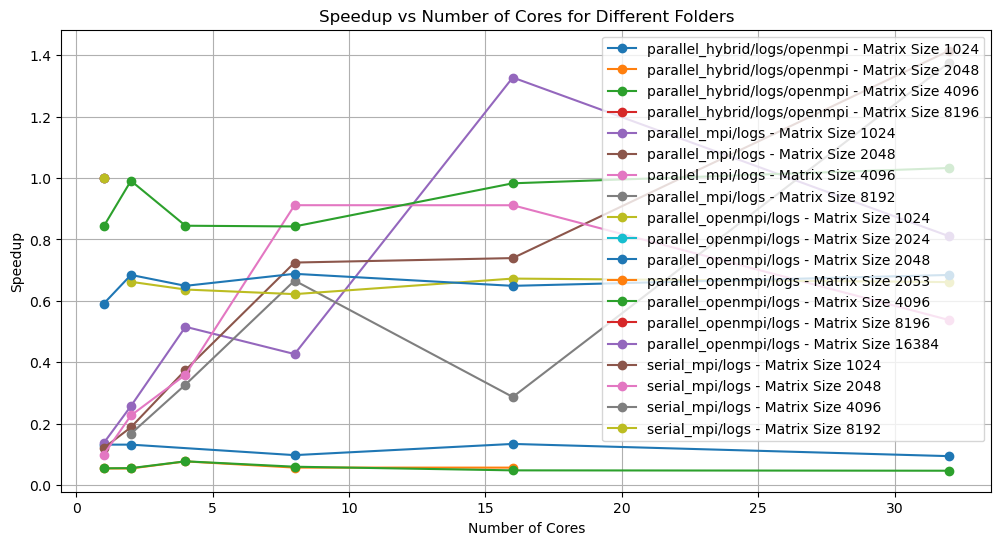

In [ ]:
import matplotlib.pyplot as plt

# Calculate speedup for each folder
serial_times = extracted_data_df_serial.groupby('Matrix Size')['Seconds'].mean()

extracted_data_df['Speedup'] = extracted_data_df.apply(
    lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
    axis=1
)

# Plot speedup for each folder
plt.figure(figsize=(12, 6))

for folder in extracted_data_df['Folder'].unique():
    subset = extracted_data_df[extracted_data_df['Folder'] == folder]
    for matrix_size in subset['Matrix Size'].unique():
        matrix_subset = subset[subset['Matrix Size'] == matrix_size]
        plt.plot(
            matrix_subset['Core Number'],
            matrix_subset['Speedup'],
            marker='o',
            label=f'{folder} - Matrix Size {matrix_size}'
        )

plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for Different Folders')
plt.legend()
plt.grid()
plt.show()

Matrix Size
1024       1.312333
2048      16.379234
4096     219.906913
8192    1482.019273
Name: Seconds, dtype: float64


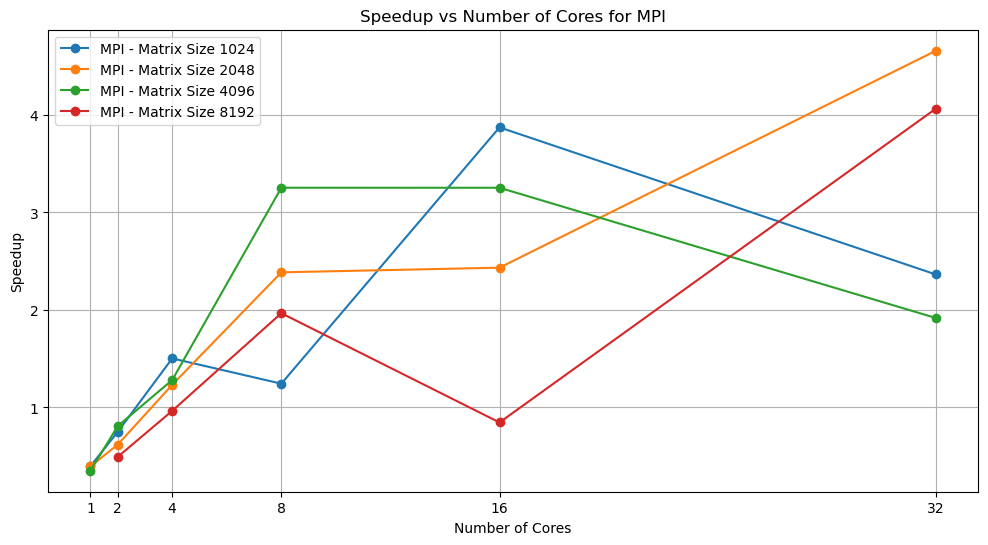

In [ ]:
# speedup for mpi
mpi_times = extracted_data_df_mpi.groupby('Matrix Size')['Seconds'].mean()
print(mpi_times)
# Calculate speedup for MPI
extracted_data_df_mpi['Speedup'] = extracted_data_df_mpi.apply(
    lambda row: mpi_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in mpi_times else None,
    axis=1
)
# Plot speedup for MPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_mpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'MPI - Matrix Size {matrix_size}'
    )

# x axis should be {2, 4, 8, 16, 32}
plt.xticks([1, 2, 4, 8, 16, 32])
plt.xlabel('Number of Cores', )
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for MPI')
plt.legend()
plt.grid()
plt.show()


MPI DataFrame with Speedup:
    Matrix Size  Core Number      Seconds    Speedup
1          1024            1     3.302270   1.000000
2          1024            2     1.749870   1.887152
4          1024            4     0.872999   3.782673
5          1024            8     1.054896   3.130422
0          1024           16     0.338842   9.745752
3          1024           32     0.555122   5.948728
13         2048            1    41.406049   1.000000
14         2048            2    26.474181   1.564016
16         2048            4    13.285272   3.116688
17         2048            8     6.864565   6.031853
12         2048           16     6.729713   6.152721
15         2048           32     3.515627  11.777714
19         4096            1   625.950603   1.000000
20         4096            2   272.107744   2.300378
22         4096            4   171.537816   3.649053
23         4096            8    67.582774   9.261984
18         4096           16    67.592233   9.260688
21         4096   

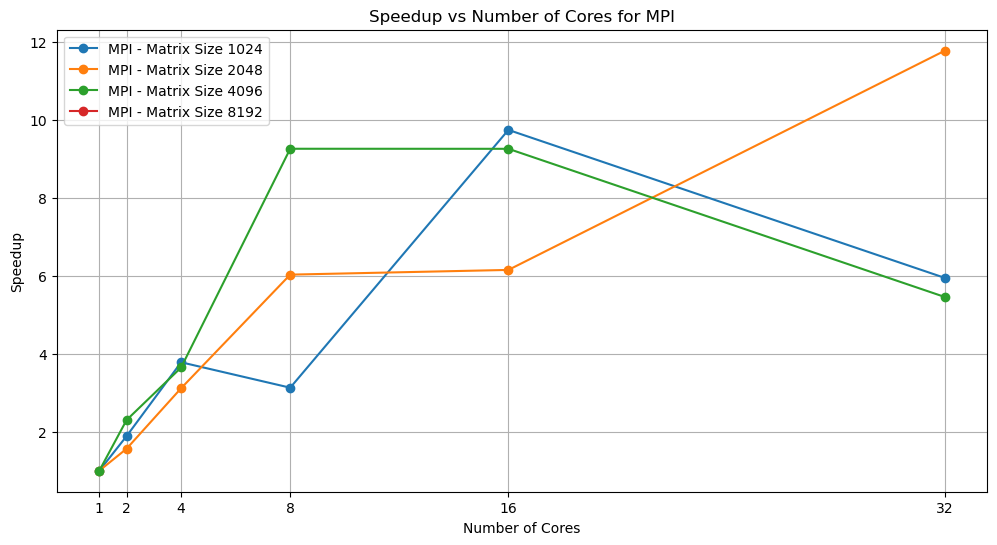

In [ ]:
# Extract serial execution times (Core Number = 1) for each matrix size
serial_times = extracted_data_df_mpi[extracted_data_df_mpi['Core Number'] == 1].set_index('Matrix Size')['Seconds']

# Calculate speedup for MPI
extracted_data_df_mpi['Speedup'] = extracted_data_df_mpi.apply(
    lambda row: serial_times[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times else None,
    axis=1
)

# Display the DataFrame with the calculated Speedup
print("MPI DataFrame with Speedup:")
print(extracted_data_df_mpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])

# Plot speedup for MPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_mpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'MPI - Matrix Size {matrix_size}'
    )

# x axis should be {2, 4, 8, 16, 32}
plt.xticks([1, 2, 4, 8, 16, 32])
plt.xlabel('Number of Cores', )
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for MPI')
plt.legend()
plt.grid()
plt.show()



OpenMPI DataFrame with Speedup:
    Matrix Size  Core Number      Seconds   Speedup
1          1024            2     0.679617       NaN
3          1024            4     0.706506       NaN
4          1024            8     0.723567       NaN
0          1024           16     0.669052       NaN
2          1024           32     0.680650       NaN
10         2024            8     8.129223       NaN
12         2048            1     8.424309  1.000000
13         2048            2     7.269258  1.158895
15         2048            4     7.667556  1.098695
16         2048            8     7.230903  1.165042
11         2048           16     7.667948  1.098639
14         2048           32     7.269895  1.158794
17         2053            8     8.245819       NaN
19         4096            1    73.122272  1.000000
20         4096            2    62.157050  1.176412
22         4096            4    72.934259  1.002578
23         4096            8    73.137709  0.999789
18         4096           16    

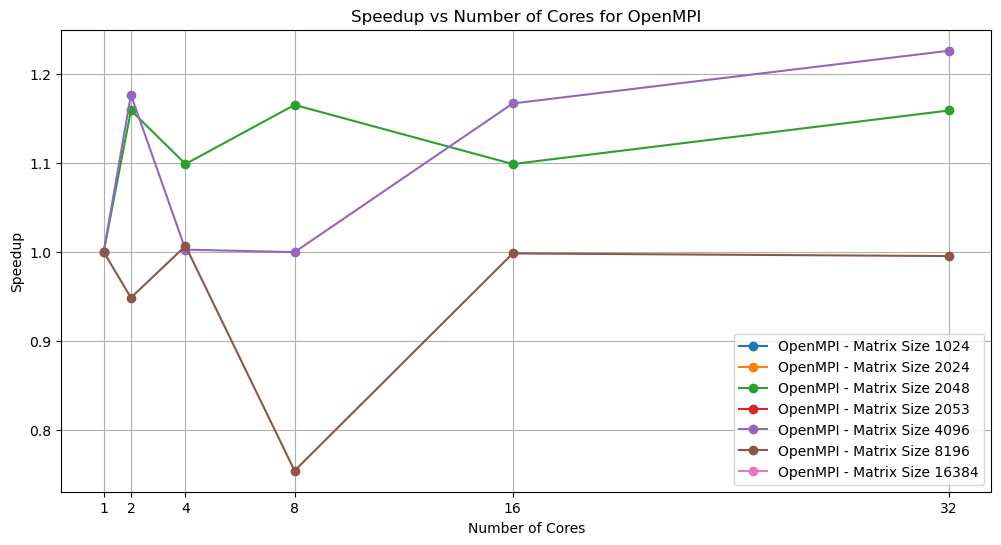

In [ ]:
# Extract serial execution times (Core Number = 1) for each matrix size
serial_times_openmpi = extracted_data_df_openmpi[extracted_data_df_openmpi['Core Number'] == 1].set_index('Matrix Size')['Seconds']

# Calculate speedup for OpenMPI
extracted_data_df_openmpi['Speedup'] = extracted_data_df_openmpi.apply(
    lambda row: serial_times_openmpi[row['Matrix Size']] / row['Seconds'] if row['Matrix Size'] in serial_times_openmpi else None,
    axis=1
)

# Display the DataFrame with the calculated Speedup
print("OpenMPI DataFrame with Speedup:")
print(extracted_data_df_openmpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup']])

# Plot speedup for OpenMPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_openmpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_openmpi[extracted_data_df_openmpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Speedup'],
        marker='o',
        label=f'OpenMPI - Matrix Size {matrix_size}'
    )

# Customize the plot
plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores for OpenMPI')
plt.legend()
plt.grid()
plt.show()




In [ ]:
# Calculate efficiency for MPI
extracted_data_df_mpi['Efficiency'] = extracted_data_df_mpi['Speedup'] / extracted_data_df_mpi['Core Number']

# Display the MPI DataFrame with Efficiency
print("MPI DataFrame with Efficiency:")
print(extracted_data_df_mpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup', 'Efficiency']])

# Calculate efficiency for OpenMPI
extracted_data_df_openmpi['Efficiency'] = extracted_data_df_openmpi['Speedup'] / extracted_data_df_openmpi['Core Number']
extracted_data_df_hybrid["Efficiency"]= extracted_data_df_hybrid['Speedup']/extracted_data_df_hybrid['core_number']
# Display the OpenMPI DataFrame with Efficiency
print("OpenMPI DataFrame with Efficiency:")
print(extracted_data_df_openmpi[['Matrix Size', 'Core Number', 'Seconds', 'Speedup', 'Efficiency']])

# Plot efficiency for MPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_mpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_mpi[extracted_data_df_mpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Efficiency'],
        marker='o',
        label=f'MPI - Matrix Size {matrix_size}'
    )

# Customize the plot
plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Cores for MPI')
plt.legend()
plt.grid()
plt.show()

# Plot efficiency for OpenMPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_openmpi['Matrix Size'].unique():
    matrix_subset = extracted_data_df_openmpi[extracted_data_df_openmpi['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Efficiency'],
        marker='o',
        label=f'OpenMPI - Matrix Size {matrix_size}'
    )

# Customize the plot
plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Cores for OpenMPI')
plt.legend()
plt.grid()
plt.show()


# Plot efficiency for hybrid OpenMPI
plt.figure(figsize=(12, 6))
for matrix_size in extracted_data_df_hybrid['Matrix Size'].unique():
    matrix_subset = extracted_data_df_hybrid[extracted_data_df_hybrid['Matrix Size'] == matrix_size]
    plt.plot(
        matrix_subset['Core Number'],
        matrix_subset['Efficiency'],
        marker='o',
        label=f'OpenMPI - Matrix Size {matrix_size}'
    )

# Customize the plot
plt.xticks([1, 2, 4, 8, 16, 32])  # Adjust x-axis ticks
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Cores for Hybrid OpenMPI')
plt.legend()
plt.grid()
plt.show()

MPI DataFrame with Efficiency:
    Matrix Size  Core Number      Seconds    Speedup  Efficiency
1          1024            1     3.302270   1.000000    1.000000
2          1024            2     1.749870   1.887152    0.943576
4          1024            4     0.872999   3.782673    0.945668
5          1024            8     1.054896   3.130422    0.391303
0          1024           16     0.338842   9.745752    0.609109
3          1024           32     0.555122   5.948728    0.185898
13         2048            1    41.406049   1.000000    1.000000
14         2048            2    26.474181   1.564016    0.782008
16         2048            4    13.285272   3.116688    0.779172
17         2048            8     6.864565   6.031853    0.753982
12         2048           16     6.729713   6.152721    0.384545
15         2048           32     3.515627  11.777714    0.368054
19         4096            1   625.950603   1.000000    1.000000
20         4096            2   272.107744   2.300378    1.1

KeyError: 'Speedup'